# Lars Lasso regression using sklearn for Human activity recognition datasets

In [32]:
from pandas import read_table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoLars

In [33]:
filename = 'features.txt'
y_label='activity'
dataframe = read_table(filename, delim_whitespace=True,names=['id', 'feature_name'])
activity_map = {str(row.id):row.label_name for i, row in read_table('activity_labels.txt',delim_whitespace=True, names=['id', 'label_name']).iterrows()}
train_data_x = read_table('train/X_train.txt', delim_whitespace=True, names=dataframe.feature_name.tolist())
train_data_y = read_table('train/y_train.txt', delim_whitespace=True, names=[y_label])
train_data_y[y_label] = train_data_y[y_label].apply(lambda x: activity_map[str(x)])
train_data = pd.concat([train_data_y, train_data_x], axis=1)
test_data_x = read_table('test/X_test.txt', delim_whitespace=True, names=dataframe.feature_name.tolist())
test_data_y = read_table('test/y_test.txt', delim_whitespace=True, names=[y_label])
test_data_y[y_label] = test_data_y[y_label].apply(lambda x: activity_map[str(x)])
test_data= pd.concat([test_data_y,test_data_x], axis=1)
array = train_data.values
X = array[:,1:10]
Y = array[:,10]

/home/gautam/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [34]:
kfold=KFold(n_splits=10,random_state=7)
scoring='neg_mean_squared_error'
model=LassoLars()
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)

# For Train Datasets

In [35]:
print(results)

[-0.25398633 -0.36449142 -0.2817842  -0.31117379 -0.27117856 -0.34510358
 -0.30678858 -0.23416015 -0.28261674 -0.32001221]


In [36]:
print(results.mean())

-0.2971295571187137


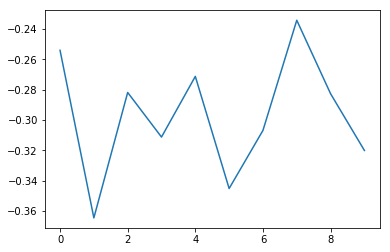

In [37]:
plt.plot(results)


# For Test Datasets

In [38]:
array=test_data.values
X=array[:,1:10]
Y=array[:,10]
kfold=KFold(n_splits=10,random_state=7)
scoring='neg_mean_squared_error'
model=LassoLars()
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)

In [39]:
print(results)

[-0.30859353 -0.24353107 -0.28960327 -0.36793707 -0.2917538  -0.24891812
 -0.23461839 -0.23350365 -0.29475779 -0.23627887]


In [40]:
print(results.mean())

-0.27494955630007645


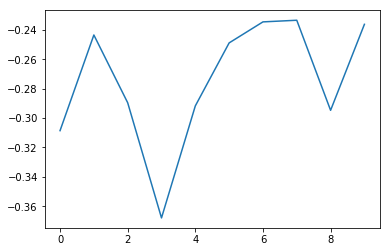

In [41]:
plt.plot(results)